Using the RGB PAnsharpened images hasn't yielded any obvious good results-- would it be more intuitive to start with RGB and refine?

The 8 band MUL tif images contain the RGB as well-- according to worldview3 website the 8 bands are
- 8 Multispectral: (red, red edge, coastal, blue, green, yellow, near-IR1 and near-IR2) 

In [1]:
%load_ext autoreload
%autoreload 2
%env PROJ_LIB=/home/wwymak/anaconda3/envs/solaris/share/proj
%matplotlib inline

from tqdm import tqdm
from skimage.external import tifffile as sktif

import shapely.wkt
import geopandas as gpd
import numpy as np
import cv2
from joblib import Parallel, delayed
from functools import partial

from fastai.imports import *
from fastai.vision import *
from fastai.metrics import dice
from fastai.callbacks import *

from joblib import Parallel, delayed
import torch.nn.functional as F
import torch
import functools, traceback
def gpu_mem_restore(func):
    "Reclaim GPU RAM if CUDA out of memory happened, or execution was interrupted"
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except:
            type, val, tb = sys.exc_info()
            traceback.clear_frames(tb)
            raise type(val).with_traceback(tb) from None
    return wrapper

os.environ['FASTAI_TB_CLEAR_FRAMES']="1"
from importlib import reload

env: PROJ_LIB=/home/wwymak/anaconda3/envs/solaris/share/proj


In [2]:
import solaris as sol
import skimage
import geopandas as gpd
from matplotlib import pyplot as plt

In [3]:
data_dir = Path("/media/wwymak/Storage/spacenet_roads")
train_dir = data_dir / "AOI_3_Paris_Roads_Train"

In [14]:
(train_dir/"RGB-PanSharpen").ls()[:5]

[PosixPath('/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img359.tif'),
 PosixPath('/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img268.tif'),
 PosixPath('/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img173.tif'),
 PosixPath('/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img160.tif'),
 PosixPath('/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img28.tif')]

In [6]:
test_img = sktif.imread("/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/MUL/MUL_AOI_3_Paris_img92.tif")

In [9]:
a = test_img[:, :, [0, 3,4]]

In [12]:
def scale_percentile(matrix):
    # scale tiff files read by tifffile to an rgb format readable by e.g. mpl for display
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

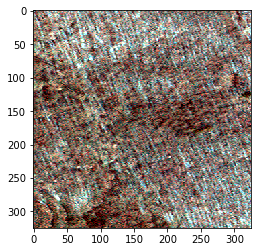

In [13]:
plt.imshow(scale_percentile(a))

In [17]:
sktif.imread('/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/MUL-PanSharpen/MUL_AOI_3_Paris_img359.tif').shape

FileNotFoundError: [Errno 2] No such file or directory: '/media/wwymak/Storage/spacenet_roads/AOI_3_Paris_Roads_Train/MUL-PanSharpen/MUL_AOI_3_Paris_img359.tif'